In [14]:
import zipfile

def extract_zip(zip_filepath, extract_dir):
  with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

extract_zip('/content/archive (10).zip', '/content')

In [15]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
test_df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')
train_df = pd.read_csv('/content/customer_churn_dataset-training-master.csv')

In [17]:
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [18]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [19]:
(train_df.shape),(test_df.shape)

((440833, 12), (64374, 12))

In [20]:
train_df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [21]:
test_df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [22]:
train_df.dropna(inplace=True)

In [23]:
train_df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [24]:
import pandas as pd
for column in train_df.columns:
  if pd.api.types.is_float_dtype(train_df[column]):
    # Use to_numeric with downcast='integer' to handle NaNs and decimals
    train_df[column] = pd.to_numeric(train_df[column], downcast='integer', errors='coerce')
    # errors='coerce' converts invalid values to NaN which then get converted to pd.NA

In [25]:
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


In [26]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [27]:
churn_df = pd.concat([train_df, test_df], axis=0)
churn_df = churn_df.reset_index(drop=True)
churn_df.shape


(505206, 12)

In [28]:
churn_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


<Axes: xlabel='Gender'>

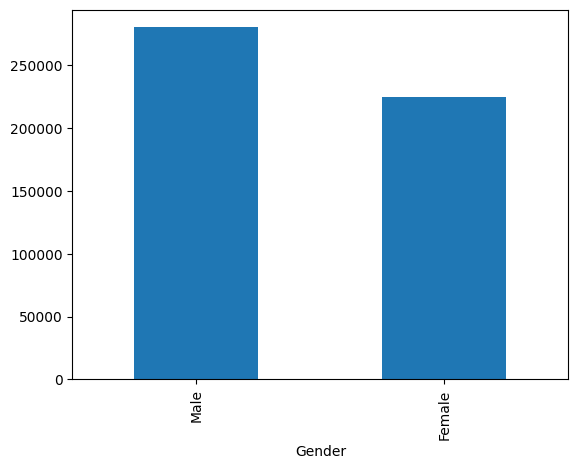

In [29]:
churn_df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender,Churn'>

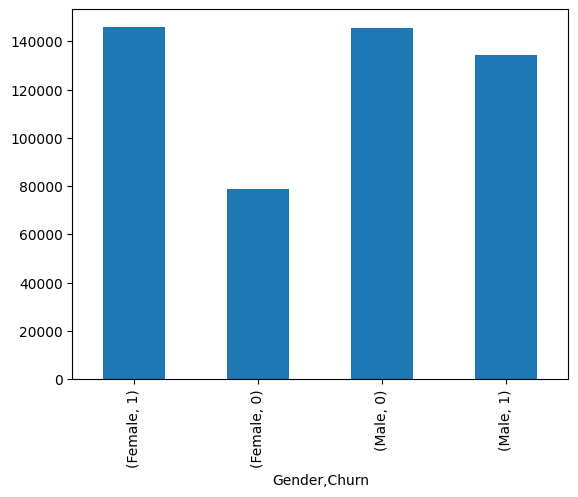

In [30]:
churn_df.groupby('Gender')['Churn'].value_counts().plot(kind='bar')

In [31]:
churn_df.to_csv('churn_df.csv', index=False)

In [32]:
# Feature Engineering


df= churn_df.copy()
# 1. Drop CustomerID since it's not useful for modeling
if 'CustomerID' in churn_df.columns:
    churn_df = churn_df.drop(columns=['CustomerID'])

# 2. Create "Recency" feature (Days since last interaction)
churn_df['Recency'] = df['Last Interaction']

# 3. Categorize "Tenure Groups"
df['Tenure Group'] = pd.cut(df['Tenure'], bins=[0, 12, 24, 48, 100], labels=['<1yr', '1-2yr', '2-4yr', '4+yr'])

# 4. Categorize "Payment Behavior"
df['Payment Behavior'] = pd.cut(df['Payment Delay'], bins=[0, 5, 15, 30, 100], labels=['On-time', 'Slightly Late', 'Late', 'Very Late'])

# 5. Create an "Engagement Score" (Usage Frequency + Support Calls normalized)
df['Engagement Score'] = (df['Usage Frequency'] + df['Support Calls']) / df[['Usage Frequency', 'Support Calls']].max().sum()

# 6. Convert categorical variables to numerical encoding
df = pd.get_dummies(df, columns=['Gender', 'Subscription Type', 'Contract Length', 'Tenure Group', 'Payment Behavior'], drop_first=True)

# Display processed dataset
df.head()


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Engagement Score,...,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Tenure Group_1-2yr,Tenure Group_2-4yr,Tenure Group_4+yr,Payment Behavior_Slightly Late,Payment Behavior_Late,Payment Behavior_Very Late
0,2,30,39,14,5,18,932.0,17,1,0.475,...,False,True,False,False,False,True,False,False,True,False
1,3,65,49,1,10,8,557.0,6,1,0.275,...,False,False,True,False,False,False,True,True,False,False
2,4,55,14,4,6,18,185.0,3,1,0.250,...,False,False,False,True,True,False,False,False,True,False
3,5,58,38,21,7,7,396.0,29,1,0.700,...,False,True,True,False,False,True,False,True,False,False
4,6,23,32,20,5,8,617.0,20,1,0.625,...,False,False,True,False,False,True,False,True,False,False


In [33]:
# Feature Engineering
# Make sure you modify churn_df directly

# 1. Drop CustomerID since it's not useful for modeling
if 'CustomerID' in churn_df.columns:
    churn_df = churn_df.drop(columns=['CustomerID'])

# 2. Create "Recency" feature (Days since last interaction)
churn_df['Recency'] = churn_df['Last Interaction'] # Use churn_df, not df

# 3. Categorize "Tenure Groups"
churn_df['Tenure Group'] = pd.cut(churn_df['Tenure'], bins=[0, 12, 24, 48, 100], labels=['<1yr', '1-2yr', '2-4yr', '4+yr']) # Use churn_df

# 4. Categorize "Payment Behavior"
churn_df['Payment Behavior'] = pd.cut(churn_df['Payment Delay'], bins=[0, 5, 15, 30, 100], labels=['On-time', 'Slightly Late', 'Late', 'Very Late']) # Use churn_df

# 5. Create an "Engagement Score" (Usage Frequency + Support Calls normalized)
churn_df['Engagement Score'] = (churn_df['Usage Frequency'] + churn_df['Support Calls']) / churn_df[['Usage Frequency', 'Support Calls']].max().sum() # Use churn_df

# 6. Convert categorical variables to numerical encoding
# Now you can use churn_df directly
churn_df = pd.get_dummies(churn_df, columns=['Gender', 'Subscription Type', 'Contract Length', 'Tenure Group', 'Payment Behavior'], drop_first=True)

# Display processed dataset
print(churn_df.head())

   Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0   30      39               14              5             18        932.0   
1   65      49                1             10              8        557.0   
2   55      14                4              6             18        185.0   
3   58      38               21              7              7        396.0   
4   23      32               20              5              8        617.0   

   Last Interaction  Churn  Recency  Engagement Score  ...  \
0                17      1       17             0.475  ...   
1                 6      1        6             0.275  ...   
2                 3      1        3             0.250  ...   
3                29      1       29             0.700  ...   
4                20      1       20             0.625  ...   

   Subscription Type_Premium  Subscription Type_Standard  \
0                      False                        True   
1                      False          

<ipython-input-34-7be59fd1c8ec>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=churn_df, palette='coolwarm')


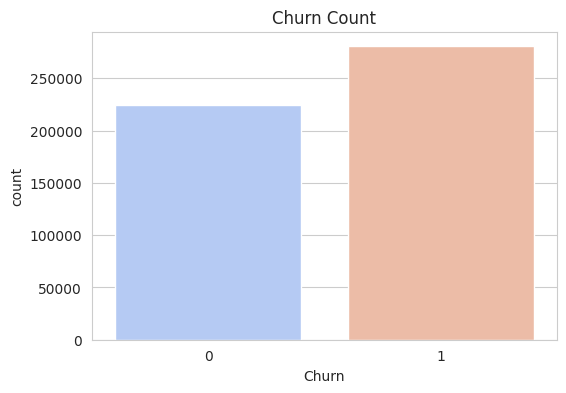

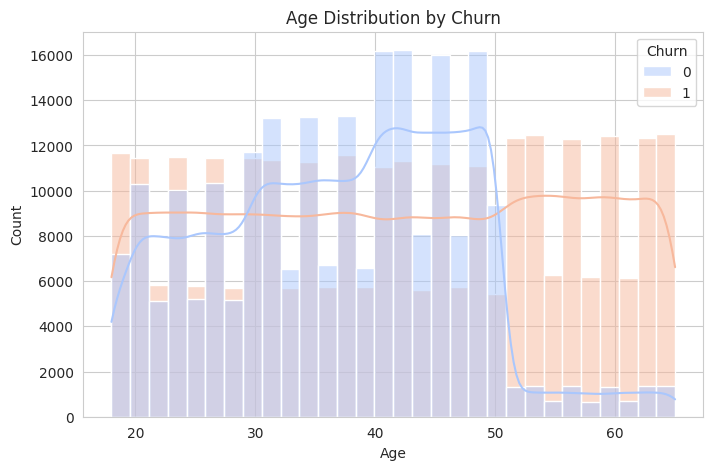

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


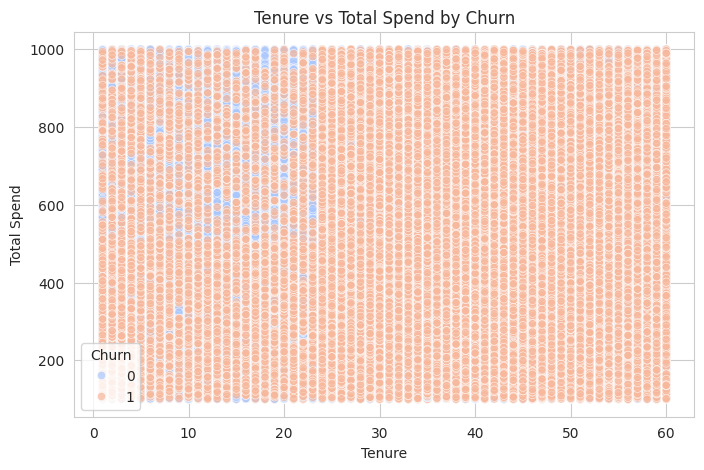

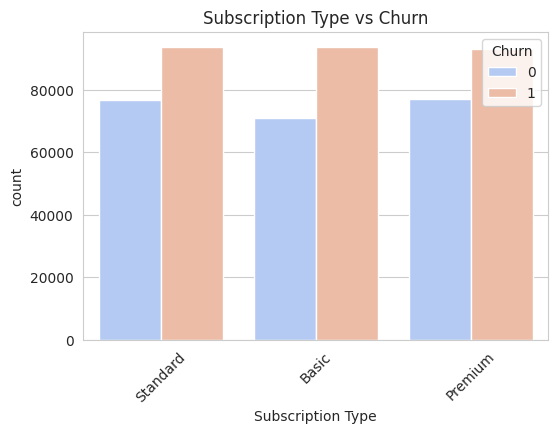

In [34]:
# Load dataset
churn_df = pd.read_csv("churn_df.csv")

# Drop unnecessary column
churn_df = churn_df.drop(columns=['CustomerID'])

# Set seaborn style
sns.set_style("whitegrid")

# 1. Churn Count Plot
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=churn_df, palette='coolwarm')
plt.title("Churn Count")
plt.show()

# 2. Age Distribution by Churn
plt.figure(figsize=(8,5))
sns.histplot(data=churn_df, x="Age", hue="Churn", kde=True, bins=30, palette="coolwarm")
plt.title("Age Distribution by Churn")
plt.show()

# 3. Tenure vs Total Spend
plt.figure(figsize=(8,5))
sns.scatterplot(data=churn_df, x="Tenure", y="Total Spend", hue="Churn", alpha=0.7, palette="coolwarm")
plt.title("Tenure vs Total Spend by Churn")
plt.show()

# 4. Subscription Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Subscription Type', hue='Churn', data=churn_df, palette='coolwarm')
plt.title("Subscription Type vs Churn")
plt.xticks(rotation=45)
plt.show()




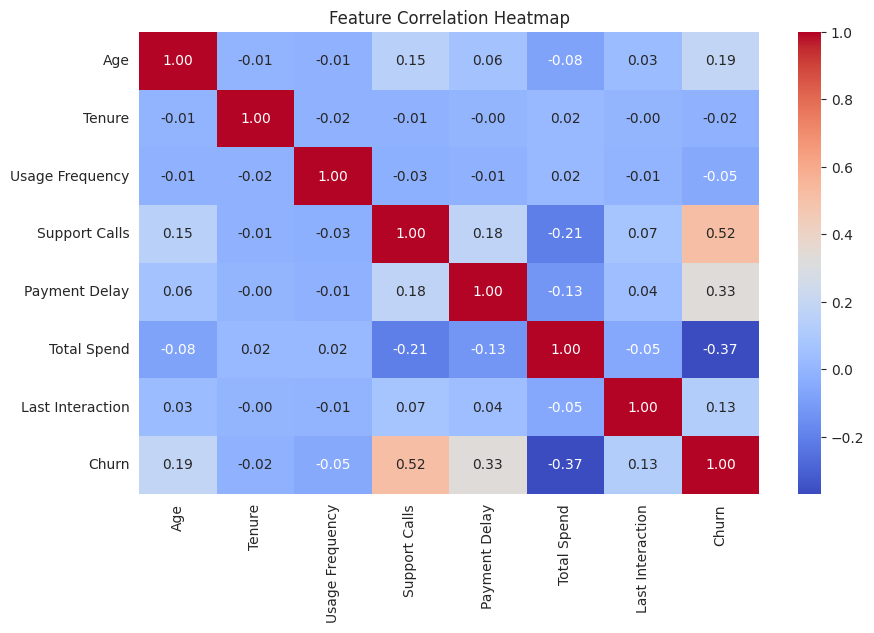

In [35]:
# 5. Heatmap of Correlations
plt.figure(figsize=(10,6))
numeric_churn_df = churn_df.select_dtypes(include=['number'])
sns.heatmap(numeric_churn_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-36-3249042d1660>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract Length', y='Churn', data=churn_df, estimator=lambda x: sum(x)/len(x), palette='coolwarm')


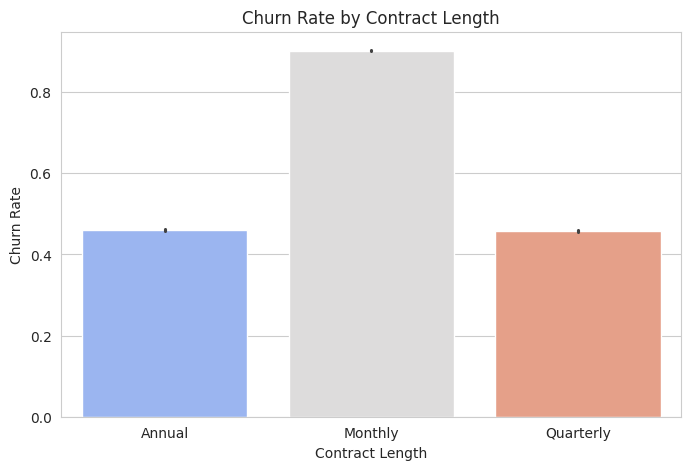

<ipython-input-36-3249042d1660>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_df[churn_df['Churn'] == 1]['Total Spend'], label="Churned", shade=True, color="red")
<ipython-input-36-3249042d1660>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_df[churn_df['Churn'] == 0]['Total Spend'], label="Not Churned", shade=True, color="blue")


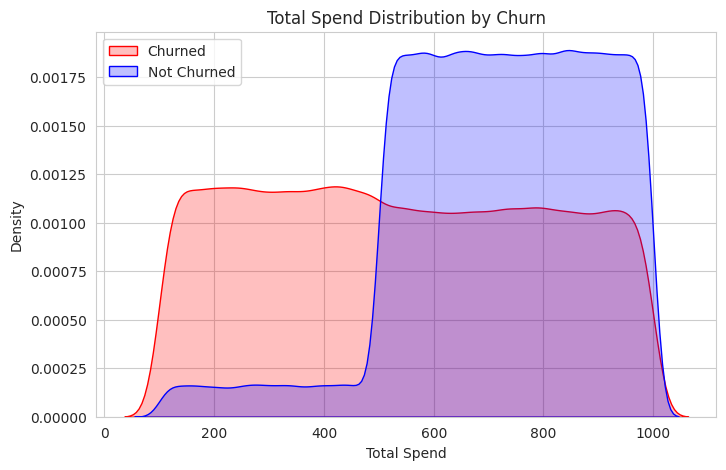

<ipython-input-36-3249042d1660>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Payment Delay", data=churn_df, palette="coolwarm")


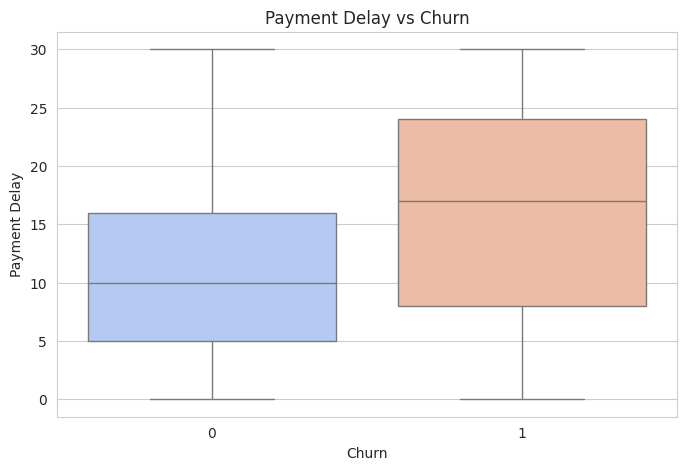

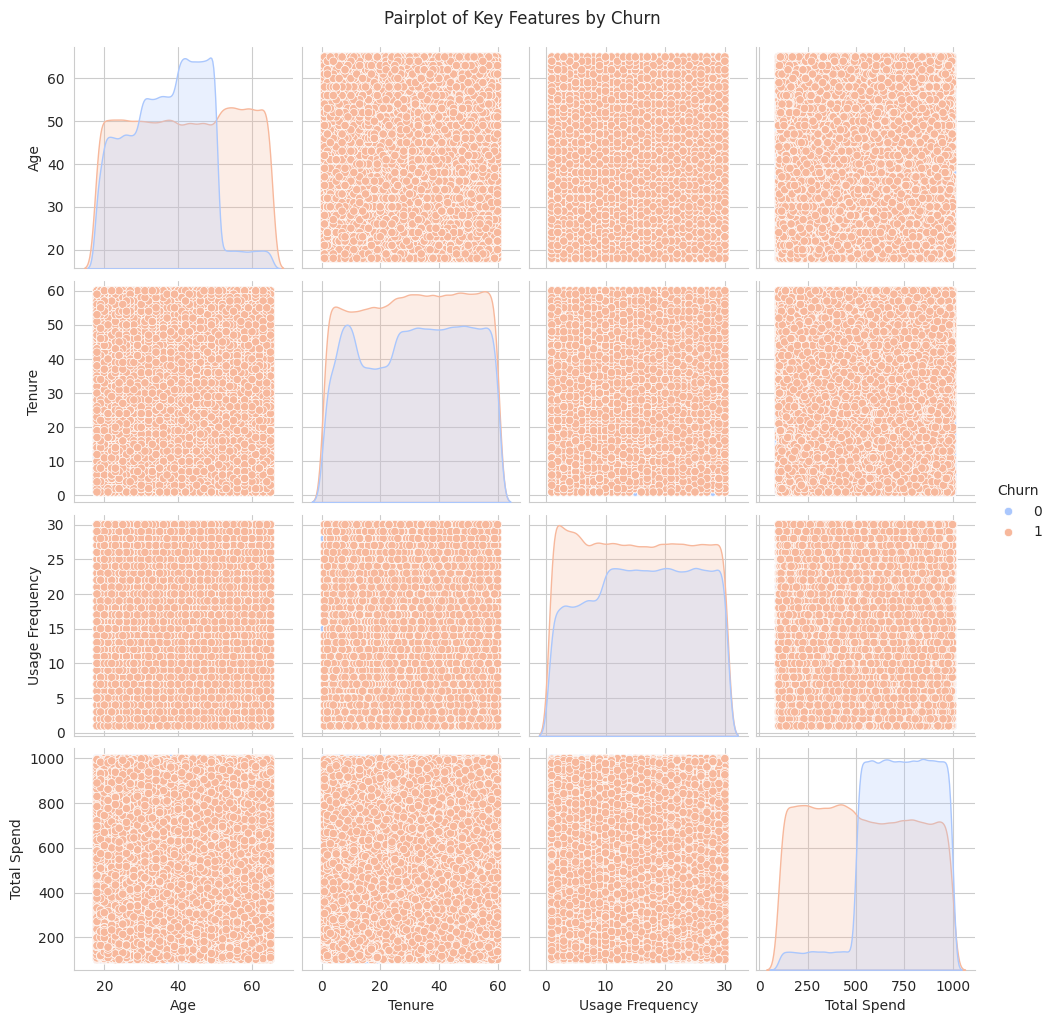

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Load dataset
churn_df = pd.read_csv("churn_df.csv")

# Drop unnecessary column
churn_df = churn_df.drop(columns=['CustomerID'])

# Set seaborn style
sns.set_style("whitegrid")

# 1️ Churn Rate by Contract Length
plt.figure(figsize=(8,5))
sns.barplot(x='Contract Length', y='Churn', data=churn_df, estimator=lambda x: sum(x)/len(x), palette='coolwarm')
plt.title("Churn Rate by Contract Length")
plt.ylabel("Churn Rate")
plt.show()

# KDE Plot for Total Spend & Churn
plt.figure(figsize=(8,5))
sns.kdeplot(churn_df[churn_df['Churn'] == 1]['Total Spend'], label="Churned", shade=True, color="red")
sns.kdeplot(churn_df[churn_df['Churn'] == 0]['Total Spend'], label="Not Churned", shade=True, color="blue")
plt.title("Total Spend Distribution by Churn")
plt.xlabel("Total Spend")
plt.legend()
plt.show()

#Boxplot of Payment Delay vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Payment Delay", data=churn_df, palette="coolwarm")
plt.title("Payment Delay vs Churn")
plt.show()

# Pairplot for Key Features
selected_features = ["Age", "Tenure", "Usage Frequency", "Total Spend", "Churn"]
sns.pairplot(churn_df[selected_features], hue="Churn", palette="coolwarm")
plt.suptitle("Pairplot of Key Features by Churn", y=1.02)
plt.show()



<ipython-input-37-601587fef9e5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="coolwarm")


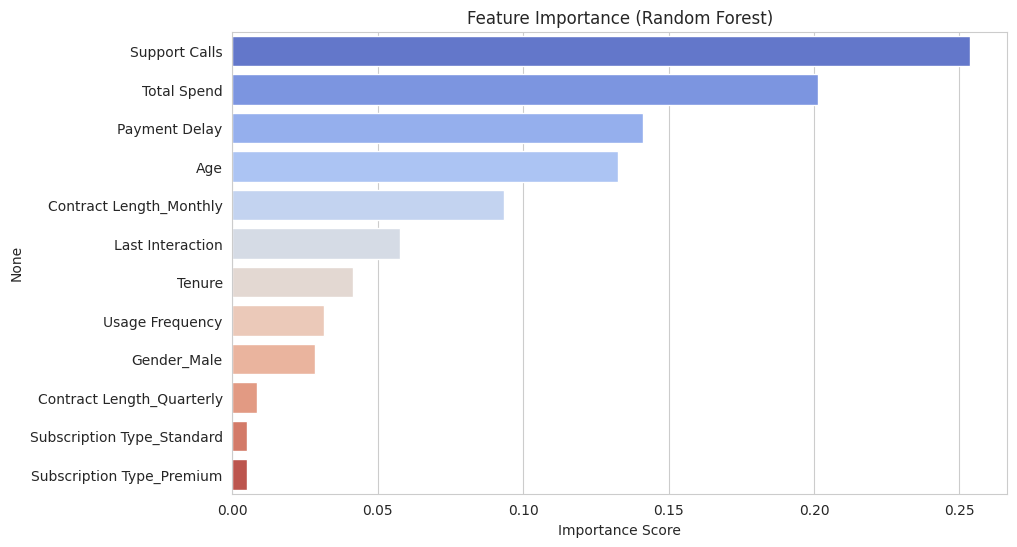

In [37]:
# Feature Importance using Random Forest
X = churn_df.drop(columns=['Churn'])  # Features
y = churn_df['Churn']  # Target

# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)

# Train a RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance plot
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="coolwarm")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [38]:
print("=>="*100)

=>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>=


In [39]:
#Churn prediction model building
_churn = churn_df.copy()
_churn.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


In [40]:
_churn.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [41]:
X = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler

ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()
x_encoded = ohe.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# prompt: train model multiple algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Train multiple algorithms
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results[model_name] = {
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1-Score": f1
  }

# Display results
for model_name, metrics in results.items():
  print(f"Model: {model_name}")
  for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")
  print("-" * 20)
